    Ben Christensen
    Math 347
    2/5/18

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt


In [2]:
# Problems 1, 3, and 5
def newton(f, x0, Df, tol=1e-5, maxiters=15, alpha=1.):
    """Use Newton's method to approximate a zero of the function f.

    Parameters:
        f (function): a function from R^n to R^n (assume n=1 until Problem 5).
        x0 (float or ndarray): The initial guess for the zero of f.
        Df (function): The derivative of f, a function from R^n to R^(nxn).
        tol (float): Convergence tolerance. The function should returns when
            the difference between successive approximations is less than tol.
        maxiters (int): The maximum number of iterations to compute.
        alpha (float): Backtracking scalar (Problem 3).

    Returns:
        (float or ndarray): The approximation for a zero of f.
        (bool): Whether or not Newton's method converged.
        (int): The number of iterations computed.
    """
    xk = x0
    iters = 0
    converged = False
    #Apply Newton's method iteravely on a scalar valued function
    if np.isscalar(xk):
        for k in range(maxiters):
            xk1 = xk - alpha * f(xk) / Df(xk)
            iters += 1
            if abs(xk1 - xk) < tol:
                converged = True
                break
            xk = xk1
    #Apply Newton's method in the multi-dimensional case
    else:
        for k in range(maxiters):
            yk = la.solve(Df(xk), f(xk))
            xk1 = xk - alpha * yk
            iters += 1
            if la.norm(xk1 - xk) < tol:
                converged = True
                break
            xk = xk1

    return xk1, converged, iters



# Problem 2
def prob2(N1, N2, P1, P2):
    """Use Newton's method to solve for the constant r that satisfies

                P1[(1+r)**N1 - 1] = P2[1 - (1+r)**(-N2)].

    Use r_0 = 0.1 for the initial guess.

    Parameters:
        P1 (float): Amount of money deposited into account at the beginning of
            years 1, 2, ..., N1.
        P2 (float): Amount of money withdrawn at the beginning of years N1+1,
            N1+2, ..., N1+N2.
        N1 (int): Number of years money is deposited.
        N2 (int): Number of years money is withdrawn.

    Returns:
        (float): the value of r that satisfies the equation.
    """
    r_0 = 0.1
    f = lambda r: P1*((1+r)**N1 - 1) - P2*(1 - (1 + r)**(-N2))
    Df = lambda r: (r+1)**(-N2 - 1)*(N1*P1*(r+1)**(N1 + N2) - N2*P2)

    return newton(f, r_0, Df)[0]


# Problem 4
def optimal_alpha(f, x0, Df, tol=1e-5, maxiters=15):
    """Run Newton's method for various values of alpha in (0,1].
    Plot the alpha value against the number of iterations until convergence.

    Parameters:
        f (function): a function from R^n to R^n (assume n=1 until Problem 5).
        x0 (float or ndarray): The initial guess for the zero of f.
        Df (function): The derivative of f, a function from R^n to R^(nxn).
        tol (float): Convergence tolerance. The function should returns when
            the difference between successive approximations is less than tol.
        maxiters (int): The maximum number of iterations to compute.

    Returns:
        (float): a value for alpha that results in the lowest number of
            iterations.
    """
    #Create a sample of alphas from (0, 1]
    alphas = np.linspace(0, 1, 1000)[1:]
    smallest = [alphas[0], newton(f, x0, Df, tol, maxiters, alphas[0])[2]]
    iterations = []
    #Test which alpha converges the fastest
    for alpha in alphas:
        iters = newton(f, x0, Df, tol, maxiters, alpha)[2]
        iterations.append(iters)
        if iters < smallest[1]:
            smallest = [alpha, iters]

    plt.plot(alphas, iterations)
    plt.title("Number of iterations to find zero for different backtracking scalars")
    plt.xlabel("Alphas")
    plt.ylabel("Iterations")
    plt.show()
    return smallest[0]



# Problem 6
def prob6():
    """Consider the following Bioremediation system.

                              5xy − x(1 + y) = 0
                        −xy + (1 − y)(1 + y) = 0

    Find an initial point such that Newton’s method converges to either
    (0,1) or (0,−1) with alpha = 1, and to (3.75, .25) with alpha = 0.55.
    Return the intial point as a 1-D NumPy array with 2 entries.
    """
    xdomain = np.linspace(-.25, 0, 100)
    ydomain = np.linspace(0, .25, 100)
    #Create the functions and Jacobian matrix
    f = lambda x: np.array([5*x[0]*x[1] - x[0]*(1+x[1]), -x[0]*x[1] + (1-x[1])*(1+x[1])])
    Df = lambda x: np.array([[4*x[1] - 1, 4*x[0]], [-x[1], -x[0] - 2*x[1]]])

    tol=1e-5
    maxiters=15
    #Initialize solution arrays
    solution1 = np.array([0, 1])
    solution2 = np.array([0, -1])
    solution3 = np.array([3.75, .25])
    #Test which combination gives the appropriate solutions
    for x in xdomain:
        for y in ydomain:
            #Testing for first condition
            candidate = np.array([x, y])
            alpha = 1.
            approx = newton(f, candidate, Df, tol, maxiters, alpha)[0]
            #Test for second condition if first condition is satisfied
            if np.allclose(solution1, approx) or np.allclose(solution2, approx):
                alpha = .55
                approx = newton(f, candidate, Df, tol, maxiters, alpha)[0]
                if np.allclose(solution3, approx):
                    return candidate

# Problem 7
def plot_basins(f, Df, zeros, domain, res=1000, iters=15):
    """Plot the basins of attraction of f on the complex plane.

    Parameters:
        f (function): A function from C to C.
        Df (function): The derivative of f, a function from C to C.
        zeros (ndarray): A 1-D array of the zeros of f.
        domain ([r_min, r_max, i_min, i_max]): A list of scalars that define
            the window limits and grid domain for the plot.
        res (int): A scalar that determines the resolution of the plot.
            The visualized grid has shape (res, res).
        iters (int): The exact number of times to iterate Newton's method.
    """
    #Create complex grid
    x_real = np.linspace(domain[0], domain[1], res)
    x_imag = np.linspace(domain[2], domain[3], res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag
    #Apply newton's method using the given function to the complex grid
    for i in range(iters):
        X_k = X_0 - f(X_0) / Df(X_0)
        X_0 = X_k
    #Create new meshgrid to visualize the zeros of f from the complex grid
    y1 = np.zeros_like(x_real)
    y2 = np.zeros_like(x_imag)
    Y_1, Y_2 = np.meshgrid(y1, y2)
    Y = Y_1 + Y_2
    for i, row in enumerate(X_0):
        for j, entry in enumerate(row):
            Y[i][j] = np.argmin(np.abs(zeros - entry))
    plt.pcolormesh(x_real, x_imag, Y, cmap="brg")
    plt.title("Basin of Attraction")
    plt.xlabel("imaginary domain")
    plt.ylabel("real domain")
    plt.show()

(-327.68000000000029, False, 15)
(6.4000000000001335e-07, True, 6)


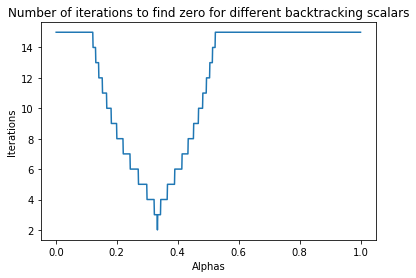

0.333333333333


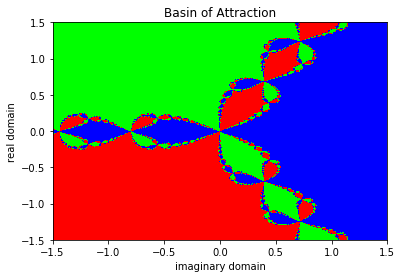

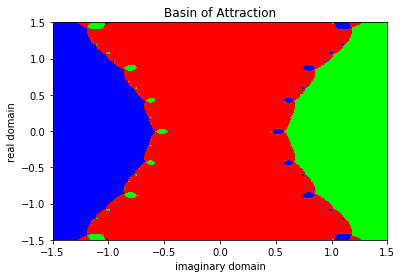

In [3]:
#Problem 3
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
Df = lambda x: (1./3)*np.power(np.abs(x), -2./3)
x0 = .01
alpha = 1
tol = 1e-5
maxiters = 15
print(newton(f, x0, Df, tol, maxiters, alpha))
alpha = .4
print(newton(f, x0, Df, tol, maxiters, alpha))
#Problem 4
best = optimal_alpha(f, x0, Df)
print(best)
#Problem 7
f = lambda x: x**3 - 1
Df = lambda x: 3*x**2
domain = [-1.5, 1.5, -1.5, 1.5]
zeros = np.array([1, -.5 - .5j*np.sqrt(3), -.5 + .5j*np.sqrt(3)])
plot_basins(f, Df, zeros, domain)

f = lambda x: x**3 - x
Df = lambda x: 3*x**2 - 1
zeros = np.array([-1, 0, 1])
plot_basins(f, Df, zeros, domain)